# Import Library

In [1493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

# Import Dataset

In [1494]:
#data_up5 = pd.read_csv('UP-5.csv')
#data_up6 = pd.read_csv('UP-6.csv')

In [1495]:
data_up5 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-5.csv')
data_up6 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-6.csv')

In [1496]:
data_up5.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


In [1497]:
data_up6.head()

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20
1,Mio,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35
2,Mio,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54
3,Mio,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31
4,Mio,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31


In [1498]:
data_up5.isnull().sum()

Formation        0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb.ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [1499]:
data_up6.isnull().sum()

FORMATION        0
BIT SIZE (in)    0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb*ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [1500]:
data_up5.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'],
      dtype='object')

In [1501]:
data_up6.columns

Index(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)',
       'WOB (ton)', 'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb*ft)',
       'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)',
       'DATE TIME'],
      dtype='object')

# Pada dataset terlampir, terdapat data kegiatan pengeboran pada sumur UP-5 dan UP-6 yang meliputi:

* FORMATION, merupakan nama formasi batuan yang ditembus pada kedalaman tertentu
* BITSIZE,merupakan ukuran bit yang digunakan (inch)
* TMD,merupakan truemeasured depth (meter)
* TVD,merupakan true vertical depth (meter)
* ROP,merupakan rate of penetration atau laju penetrasi (meter/jam)
* WOB,merupakan weight on bit (ton)
* FR,merupakan laju alir lumpur (gallon/menit)
* SPP,merupakan stand-pipe pressure (psi)
* RPM,merupakan angular speed dari rotasi drillstring (rpm)
* TQ,merupakan bacaan torque (pound-foot)
* MWIN,merupakan densitas lumpur yang dipompakan melalui drillstring (pound/gallon)
* MWOUT,merupakan densitas lumpur yang kembali kepermukaan (pound/gallon)
* RETURN,merupakan persentase volume lumpur yang kembali kepermukaan (%)
* BITTIME,merupakan durasi penggunaan bit yang sama (jam)
* DATETIME,merupakan tanggal dan waktu untuk menembus kedalaman tertentu

# Exploratory Data Analysis

In [1502]:
data_up5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Formation      2058 non-null   object 
 1   TMD (m)        2058 non-null   int64  
 2   TVD (m)        2058 non-null   float64
 3   ROP (m/hr)     2058 non-null   float64
 4   WOB (ton)      2058 non-null   int64  
 5   FR (gpm)       2058 non-null   float64
 6   SPP (psi)      2058 non-null   int64  
 7   RPM (rpm)      2058 non-null   int64  
 8   TQ (lb.ft)     2058 non-null   int64  
 9   MW IN (ppg)    2058 non-null   float64
 10  MW OUT (ppg)   2058 non-null   float64
 11  RETURN (%)     2058 non-null   int64  
 12  BIT TIME (hr)  2058 non-null   float64
 13  DATE TIME      2058 non-null   object 
dtypes: float64(6), int64(6), object(2)
memory usage: 225.2+ KB


In [1503]:
data_up6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FORMATION      2513 non-null   object 
 1   BIT SIZE (in)  2513 non-null   float64
 2   TMD (m)        2513 non-null   int64  
 3   TVD (m)        2513 non-null   float64
 4   ROP (m/hr)     2513 non-null   float64
 5   WOB (ton)      2513 non-null   int64  
 6   FR (gpm)       2513 non-null   float64
 7   SPP (psi)      2513 non-null   int64  
 8   RPM (rpm)      2513 non-null   int64  
 9   TQ (lb*ft)     2513 non-null   int64  
 10  MW IN (ppg)    2513 non-null   float64
 11  MW OUT (ppg)   2513 non-null   float64
 12  RETURN (%)     2513 non-null   int64  
 13  BIT TIME (hr)  2513 non-null   float64
 14  DATE TIME      2513 non-null   object 
dtypes: float64(7), int64(6), object(2)
memory usage: 294.6+ KB


# Dataset UP-5

## Multivariate Data Analysis

In [1504]:
#sns.pairplot(data_up5)

**Correlation matrix** compute pairwise correlation of columns in dataframe. There are several method of correlation based on data type:
* Pearson
* Kendall
* Spearman

We can use `corr` method from pandas, which return another data frame of correlation coefficients between variables

In [1505]:
data_up5.corr(method='pearson')

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_61342/433944912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_up5.corr(method='pearson')


,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
TMD (m),1.000000,1.000000,-0.227054,0.236270,-0.121767,0.948814,0.722908,0.064018,0.765365,0.879116,0.358008,0.994750
TVD (m),1.000000,1.000000,-0.227043,0.236264,-0.121764,0.948812,0.722911,0.064014,0.765362,0.879119,0.358008,0.994746
ROP (m/hr),-0.227054,-0.227043,1.000000,-0.405112,0.232410,-0.103467,-0.022481,-0.040455,0.118103,0.010952,0.243881,-0.241818
WOB (ton),0.236270,0.236264,-0.405112,1.000000,0.139157,0.210405,0.154641,0.396434,-0.128102,-0.003600,0.132256,0.260203
FR (gpm),-0.121767,-0.121764,0.232410,0.139157,1.000000,0.053758,0.082661,0.283229,-0.139047,-0.132879,0.613617,-0.129167
SPP (psi),0.948814,0.948812,-0.103467,0.210405,0.053758,1.000000,0.730816,0.115270,0.772071,0.861910,0.517864,0.942389
RPM (rpm),0.722908,0.722911,-0.022481,0.154641,0.082661,0.730816,1.000000,0.007684,0.524779,0.618517,0.474464,0.723161
TQ (lb.ft),0.064018,0.064014,-0.040455,0.396434,0.283229,0.115270,0.007684,1.000000,-0.116015,-0.069147,0.216287,0.059622
MW IN (ppg),0.765365,0.765362,0.118103,-0.128102,-0.139047,0.772071,0.524779,-0.116015,1.000000,0.953472,0.391870,0.749850
MW OUT (ppg),0.879116,0.879119,0.010952,-0.003600,-0.132879,0.861910,0.618517,-0.069147,0.953472,1.000000,0.420085,0.860783


Correlation matrix can be represented in color-coded **heatmap plot** (using `heatmap` from seaborn)

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_61342/866321558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')


[Text(0.5, 1.0, 'UP-5')]

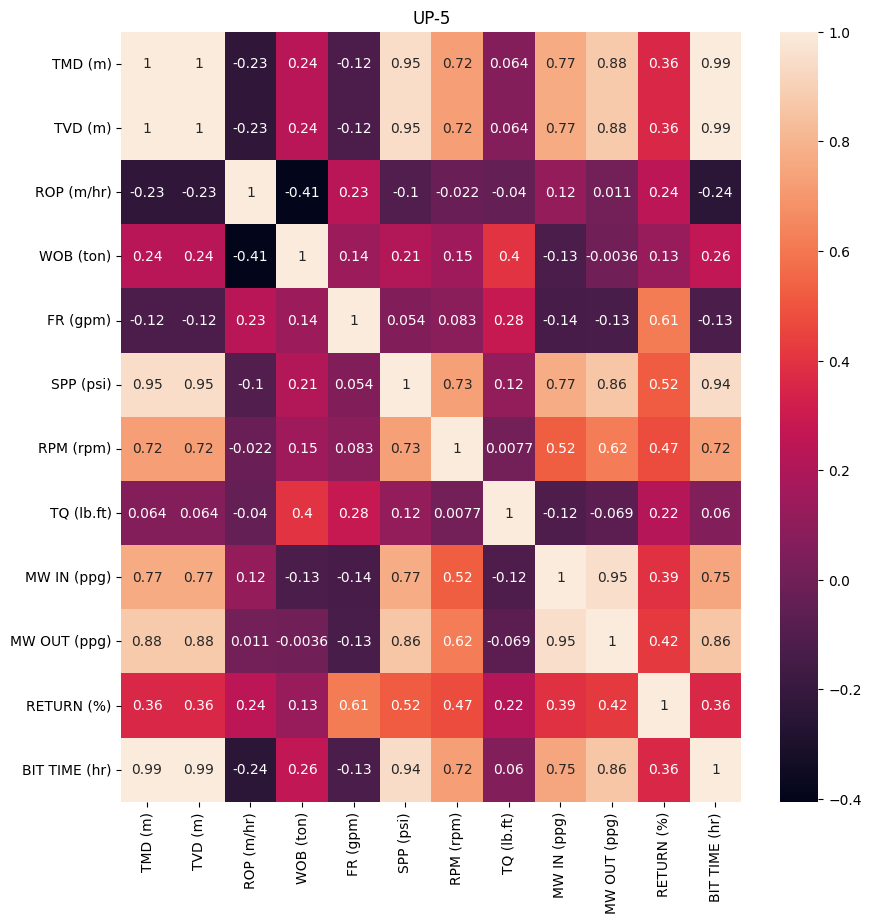

In [1506]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')

# Preprocessing Dataset UP-5

In [1507]:
#read data

#data_up5 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-5.csv')
data_up5.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


In [1508]:
data_up5.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'],
      dtype='object')

In [1509]:
#drop feature yang tidak diperlukan

data_up5.drop(['Formation', 'TMD (m)', 'FR (gpm)', 'SPP (psi)',  'TQ (lb.ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up5.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,428.01,33.3,3,70,10.4
1,429.01,39.3,4,79,10.4
2,430.00,26.7,3,79,10.4
3,430.99,29.1,5,82,10.4
4,432.00,40.8,10,92,10.4


[Text(0.5, 1.0, 'UP-5')]

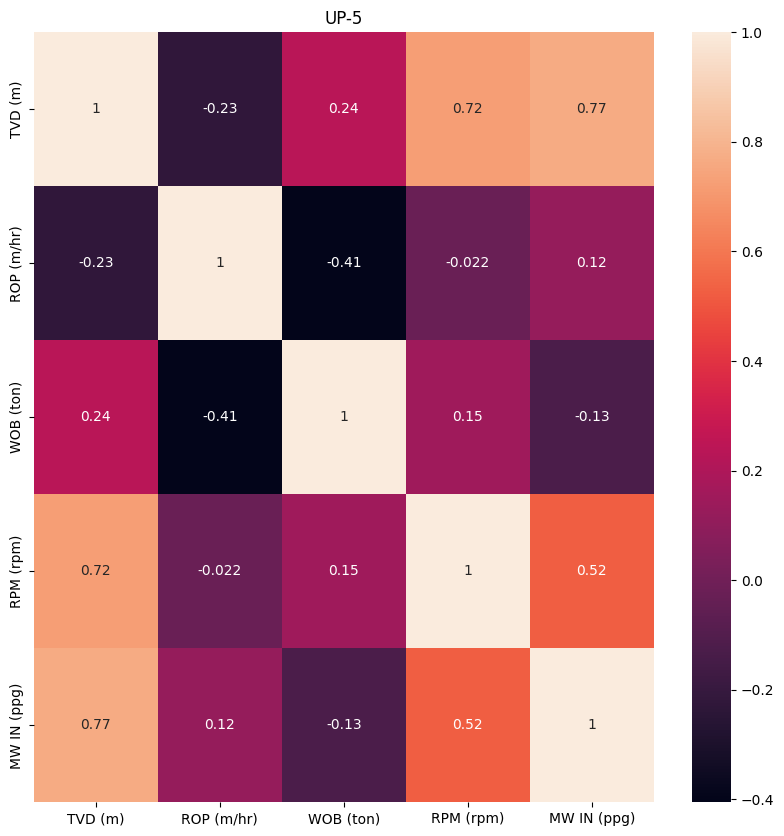

In [1510]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')

In [1511]:
data_up5.describe()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,1456.411924,72.522935,8.744412,156.351312,10.852662
std,594.199795,32.636414,3.591133,23.840552,0.250399
min,428.010000,3.100000,0.000000,70.000000,10.400000
25%,942.177500,49.725000,7.000000,146.000000,10.500000
50%,1456.425000,67.200000,9.000000,158.000000,11.000000
75%,1970.667500,91.875000,11.000000,167.000000,11.000000
max,2484.790000,203.200000,22.000000,199.000000,11.000000


## Scaling and Normalization

In [1512]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [1513]:
data_up5.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,428.01,33.3,3,70,10.4
1,429.01,39.3,4,79,10.4
2,430.00,26.7,3,79,10.4
3,430.99,29.1,5,82,10.4
4,432.00,40.8,10,92,10.4


In [1514]:
minmax_scaler.fit(data_up5)
std_scaler.fit(data_up5)

data_minmax = minmax_scaler.transform(data_up5)
data_std = std_scaler.transform(data_up5)

In [1515]:
data_minmax= pd.DataFrame(data_minmax, columns= data_up5.columns)
data_minmax.describe()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,0.500006,0.346941,0.397473,0.669390,0.754436
std,0.288898,0.163101,0.163233,0.184810,0.417332
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249987,0.233008,0.318182,0.589147,0.166667
50%,0.500012,0.320340,0.409091,0.682171,1.000000
75%,0.750035,0.443653,0.500000,0.751938,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [1516]:
data_minmax= pd.DataFrame(data_std, columns= data_up5.columns)
data_minmax.describe()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
count,2058.000000,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03
mean,0.000000,4.419313e-16,-5.524142e-17,2.209657e-16,-5.745107e-15
std,1.000243,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00
min,-1.731155,-2.127679e+00,-2.435593e+00,-3.622915e+00,-1.808201e+00
25%,-0.865634,-6.987127e-01,-4.858734e-01,-4.342948e-01,-1.408741e+00
50%,0.000022,-1.631377e-01,7.118925e-02,6.917159e-02,5.885565e-01
75%,0.865669,5.931034e-01,6.282519e-01,4.467714e-01,5.885565e-01
max,1.731115,4.005000e+00,3.692096e+00,1.789348e+00,5.885565e-01


## Normalization

In [1517]:
data_up5_norm = data_up5

In [1518]:
from sklearn.preprocessing import normalize
data_normal_up5 = normalize(X= data_up5_norm, norm='l2', axis=1)

In [1519]:
data_normal_up5 = pd.DataFrame(data_normal_up5, columns= data_up5_norm.columns)
data_normal_up5.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,0.983688,0.076533,0.006895,0.160880,0.023902
1,0.979181,0.089699,0.009130,0.180311,0.023737
2,0.981410,0.060939,0.006847,0.180306,0.023736
3,0.979886,0.066161,0.011368,0.186433,0.023645
4,0.973406,0.091933,0.022533,0.207299,0.023434


# Linear Regression

In [1520]:
X = data_normal_up5.drop(['ROP (m/hr)'], axis=1)
y = data_normal_up5['ROP (m/hr)']

In [1521]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1522]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)


X_train_scaled = sc.transform(X_train)
X_train_scaled

array([[-0.39134899, -1.17031917,  0.48128975,  0.41942935],
       [-2.54134534,  1.06597951,  1.69663269,  2.98499731],
       [-1.09865353, -0.81552058,  1.53592171,  1.33254218],
       ...,
       [ 0.54478032, -0.37813842, -0.50299573, -0.41604498],
       [-2.33910517,  1.63184348,  1.83196119,  1.34805602],
       [ 0.51681955, -0.35546282, -0.4592173 , -0.37888528]])

In [1523]:
X_train.columns

Index(['TVD (m)', 'WOB (ton)', 'RPM (rpm)', 'MW IN (ppg)'], dtype='object')

In [1524]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_train_scaled.head()

,TVD (m),WOB (ton),RPM (rpm),MW IN (ppg)
0,-0.391349,-1.170319,0.481290,0.419429
1,-2.541345,1.065980,1.696633,2.984997
2,-1.098654,-0.815521,1.535922,1.332542
3,0.751467,-0.494316,-0.857345,-0.888954
4,0.605573,-0.342864,-0.608528,-0.690400


In [1525]:
X_test_scaled = sc.transform(X_test)

In [1526]:
X.columns

Index(['TVD (m)', 'WOB (ton)', 'RPM (rpm)', 'MW IN (ppg)'], dtype='object')

In [1527]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

In [1528]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled

,TVD (m),WOB (ton),RPM (rpm),MW IN (ppg)
0,0.604219,-0.427444,-0.621941,-0.496845
1,0.695458,-0.569052,-0.763095,-0.872254
2,0.201598,-0.805543,-0.152133,-0.213867
3,-1.881016,3.011586,1.663820,2.145565
4,0.487955,-0.838672,-0.339782,-0.322450
...,...,...,...,...
407,-0.872862,1.640088,1.286361,1.075981
408,0.729428,-0.548937,-0.822423,-0.960562
409,0.724626,-0.544415,-0.788721,-0.954633
410,0.587458,-0.508397,-0.559335,-0.629507


In [1529]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

## Model elevation on training set

In [1530]:
y_pred_train = regressor.predict(X_train_scaled)

In [1531]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7446983682621608

In [1532]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train, squared=False)

0.020727964759065708

Text(0.5, 1.0, 'using training set')

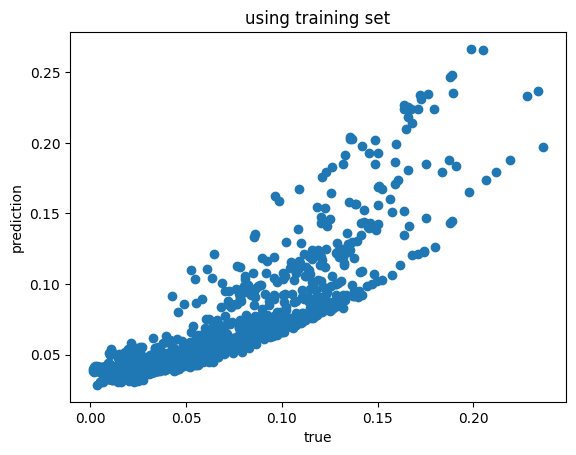

In [1533]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using training set')

## Model elevation on testing set

In [1534]:
y_pred_test = regressor.predict(X_test_scaled)

In [1535]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.7028772552762172

In [1536]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test, squared=False)

0.020411007804133203

Text(0.5, 1.0, 'using testing set')

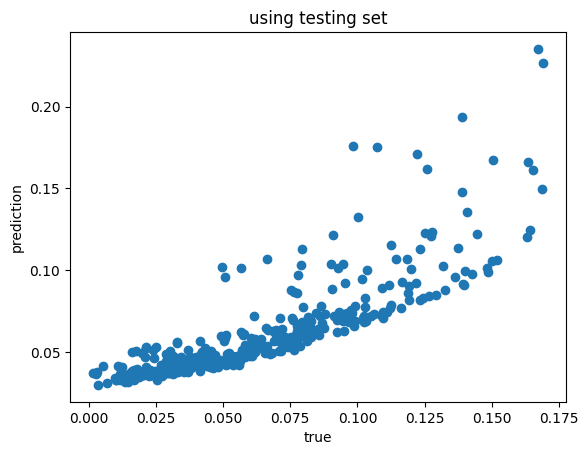

In [1537]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using testing set')

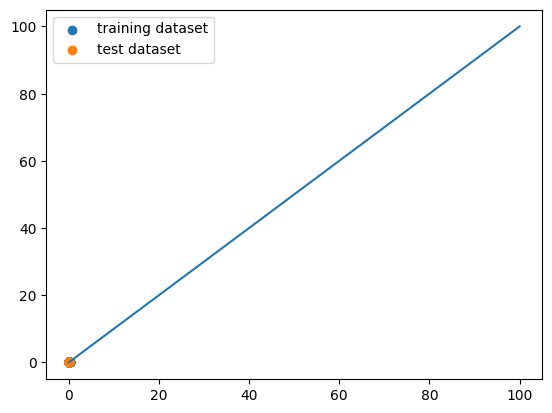

In [1538]:
plt.scatter(y_train, y_pred_train, label="training dataset")
plt.scatter(y_test, y_pred_test, label="test dataset")
plt.plot([0,100], [0,100])
plt.legend()

# Validation Curve and Learning Curve for Linear Regression

## Learning Curve

In [1539]:
train_sizes = np.linspace(0.05, 1, 9)

In [1540]:
train_sizes, train_scores, valid_scores, fit_times, _ = learning_curve(Ridge(), 
                                                                      X_train_scaled, 
                                                                      y_train, cv=10, 
                                                                      train_sizes=train_sizes, return_times=True)

In [1541]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

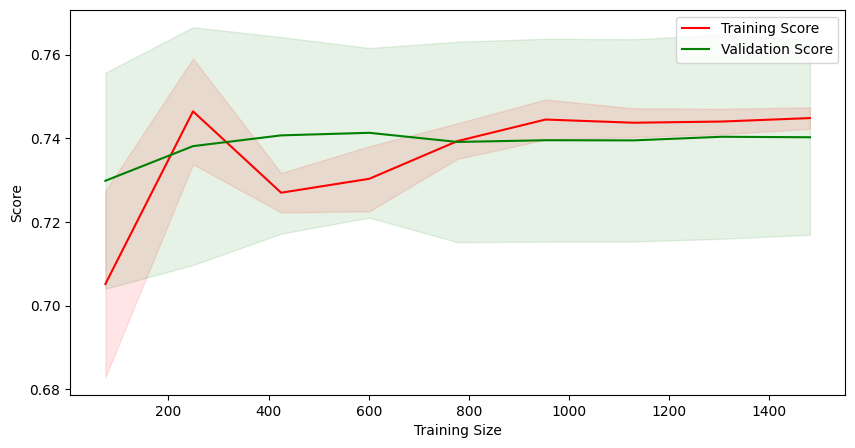

In [1542]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(train_sizes, train_scores_mean, label='Training Score', color='red')
axes.plot(train_sizes, valid_scores_mean, label='Validation Score', color='green')
axes.fill_between(train_sizes, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='green',
                  alpha=0.1)
axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Training Size')
axes.set_ylabel('Score')

## Validation Curve 

In [1543]:
param_range=np.logspace(-7, 5, 12)
train_scores, valid_scores = validation_curve(Ridge(), 
                                              X_train_scaled, 
                                              y_train, 
                                              param_range=param_range, 
                                              param_name='alpha', cv=10)

In [1544]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

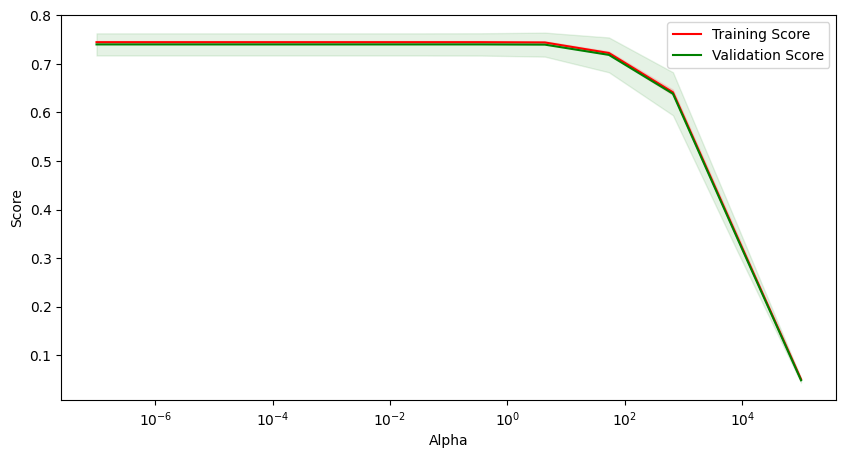

In [1545]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.semilogx(param_range, train_scores_mean, label='Training Score', color='red')
axes.semilogx(param_range, valid_scores_mean, label='Validation Score', color='green')
axes.fill_between(param_range, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='green',
                  alpha=0.1)
axes.fill_between(param_range, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Alpha')
axes.set_ylabel('Score')

# Hyperparameter Tuning for Linear Regression

In [1546]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.linspace(0.1, 1.2, 11),
              'fit_intercept': [True, False]}

search = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=10)

search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.1 , 0.21, 0.32, 0.43, 0.54, 0.65, 0.76, 0.87, 0.98, 1.09, 1.2 ]),
                         'fit_intercept': [True, False]},
             scoring='r2')

In [1547]:
search.best_params_

{'alpha': 0.5399999999999999, 'fit_intercept': True}

In [1548]:
model= search.best_estimator_

In [1549]:
model.fit(X_train_scaled, y_train)

Ridge(alpha=0.5399999999999999)

# Evaluation on Testing Set

In [1550]:
y_pred_test = model.predict(X_test_scaled)

Text(0.5, 1.0, 'using testing set')

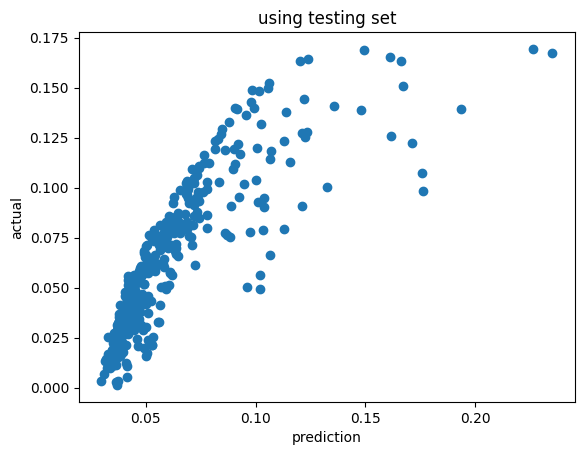

In [1551]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using testing set')

In [1552]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7025807318268423

# Evauation on Training Set

In [1553]:
y_pred_train = model.predict(X_train_scaled)

Text(0.5, 1.0, 'using training set')

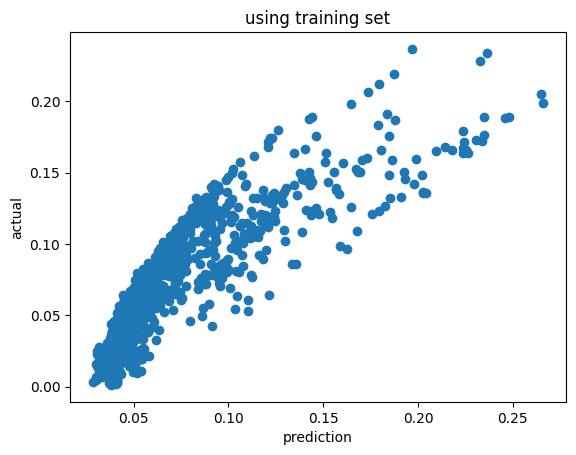

In [1554]:
plt.scatter(y_pred_train, y_train)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using training set')

In [1555]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.7446897994815149

## Permutation Feature Importance for Linear Regression

In [1556]:
from sklearn.inspection import permutation_importance

In [1557]:
r = permutation_importance(model,
                           X_train_scaled,
                           y_train,
                           n_repeats=10)

In [1558]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

TVD (m) 	3.883 +/- 0.126
RPM (rpm)	1.409 +/- 0.033
MW IN (ppg)	0.308 +/- 0.012
WOB (ton)	0.077 +/- 0.002


In [1559]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([3.88313193, 0.07690353, 1.40888804, 0.30751008])

In [1560]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([1, 3, 2, 0])

[Text(0, 0, 'WOB (ton)'),
 Text(0, 1, 'MW IN (ppg)'),
 Text(0, 2, 'RPM (rpm)'),
 Text(0, 3, 'TVD (m)')]

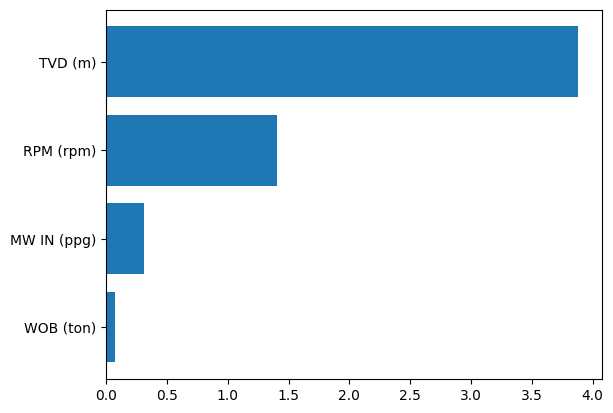

In [1561]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

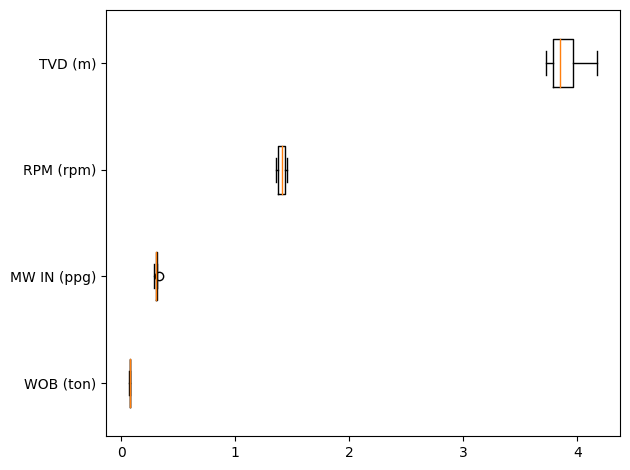

In [1562]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

In [1563]:
r.importances_mean

array([3.88313193, 0.07690353, 1.40888804, 0.30751008])

In [1564]:
r.importances_std

array([0.12611901, 0.00231601, 0.03314403, 0.0115252 ])

# Result Interpretation

In [1565]:
regressor.intercept_

0.06180977708524759

In [1566]:
regressor.coef_

array([-0.05733091, -0.00804035, -0.03479721,  0.01615608])

## Prediction using The Model

In [1645]:
input_FR = 428
input_WOB = 3
input_RPM = 70
input_MW_IN = 10

In [1647]:
input = np.array([input_FR, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428,   3,  70,  10]])

In [1648]:
output = regressor.predict(sc.transform(input))
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.97903065])

## Cross Validation

In [1570]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=regressor, X=X_train_scaled, y=y_train, cv=5)

array([0.73862529, 0.73768526, 0.7330339 , 0.75261042, 0.75388882])

In [1571]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= regressor, X= X_train_scaled, y= y_train, cv= 10)
scores

array([0.75351241, 0.72054759, 0.70203821, 0.76988978, 0.71373249,
       0.73310905, 0.77488281, 0.73113255, 0.75290257, 0.75058353])

In [1572]:
np.mean(scores)

0.7402330999055803

In [1573]:
np.std(scores)

0.02281738654805714

# Dataset UP-6

In [1574]:
#sns.pairplot(data_up6)

**Correlation matrix** compute pairwise correlation of columns in dataframe. There are several method of correlation based on data type:
* Pearson
* Kendall
* Spearman

We can use `corr` method from pandas, which return another data frame of correlation coefficients between variables

In [1575]:
data_up6.corr(method='pearson')

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_61342/2442845181.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_up6.corr(method='pearson')


,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
BIT SIZE (in),1.000000,-0.564561,-0.564697,-0.395906,-0.345071,-0.806407,-0.765866,-0.725579,-0.587793,-0.839315,-0.780813,-0.917750,-0.425614
TMD (m),-0.564561,1.000000,1.000000,0.213169,0.438040,0.361647,0.888552,0.713320,0.602749,0.696235,0.690205,0.349969,0.956735
TVD (m),-0.564697,1.000000,1.000000,0.213224,0.438084,0.361773,0.888589,0.713368,0.602798,0.696284,0.690258,0.350125,0.956732
ROP (m/hr),-0.395906,0.213169,0.213224,1.000000,-0.135966,0.378144,0.428617,0.442368,0.164085,0.435029,0.442725,0.377494,0.123662
WOB (ton),-0.345071,0.438040,0.438084,-0.135966,1.000000,0.290254,0.404253,0.397486,0.683036,0.275437,0.404190,0.313981,0.484094
FR (gpm),-0.806407,0.361647,0.361773,0.378144,0.290254,1.000000,0.658340,0.599569,0.464492,0.664933,0.661712,0.931962,0.262606
SPP (psi),-0.765866,0.888552,0.888589,0.428617,0.404253,0.658340,1.000000,0.837415,0.671081,0.894277,0.869063,0.624811,0.772767
RPM (rpm),-0.725579,0.713320,0.713368,0.442368,0.397486,0.599569,0.837415,1.000000,0.578699,0.798945,0.765616,0.604082,0.632593
TQ (lb*ft),-0.587793,0.602749,0.602798,0.164085,0.683036,0.464492,0.671081,0.578699,1.000000,0.625198,0.639410,0.482882,0.512618
MW IN (ppg),-0.839315,0.696235,0.696284,0.435029,0.275437,0.664933,0.894277,0.798945,0.625198,1.000000,0.894667,0.678333,0.515321


Correlation matrix can be represented in color-coded **heatmap plot** (using `heatmap` from seaborn)

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_61342/73810749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')


[Text(0.5, 1.0, 'UP-6')]

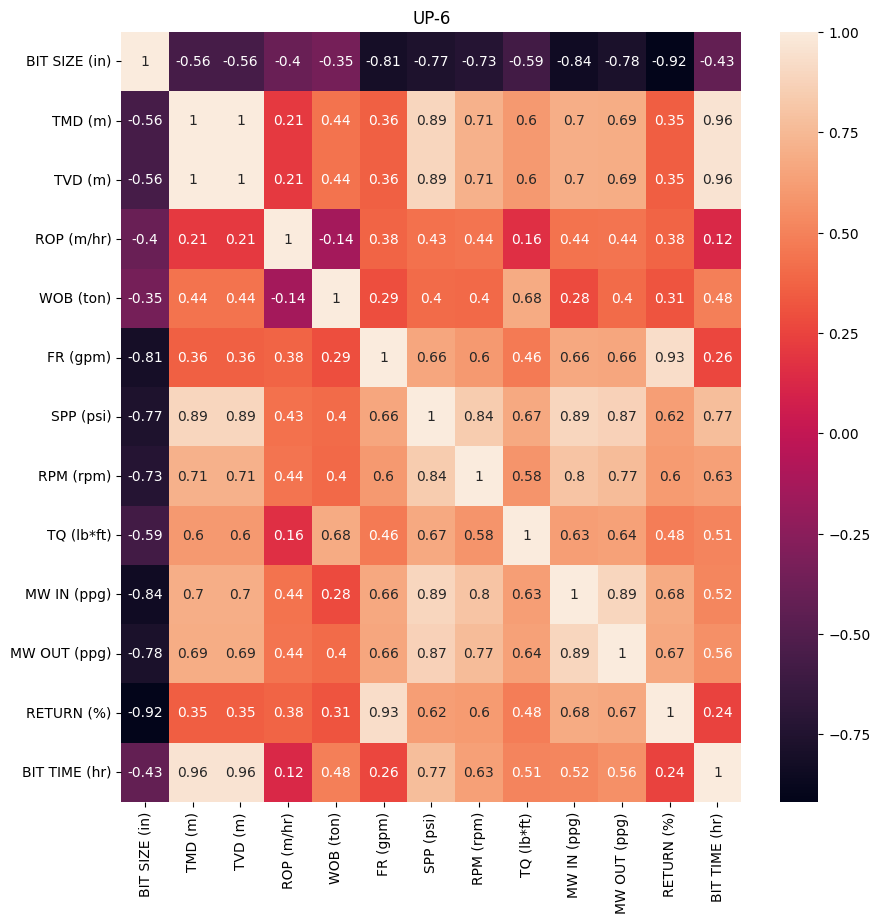

In [1576]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')

# Preprocessing Dataset UP-6

In [1577]:
#read data

data_up6 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-6.csv')
data_up6.head()

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20
1,Mio,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35
2,Mio,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54
3,Mio,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31
4,Mio,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31


In [1578]:
data_up6.columns

Index(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)',
       'WOB (ton)', 'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb*ft)',
       'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)',
       'DATE TIME'],
      dtype='object')

In [1579]:
#drop feature yang tidak diperlukan

data_up6.drop(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'FR (gpm)', 'SPP (psi)', 'TQ (lb*ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up6.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,18.02,25.6,2,62,8.7
1,19.00,35.5,2,57,8.7
2,19.50,20.6,2,43,8.7
3,19.50,20.1,2,58,8.7
4,19.50,19.9,2,58,8.7


[Text(0.5, 1.0, 'UP-6')]

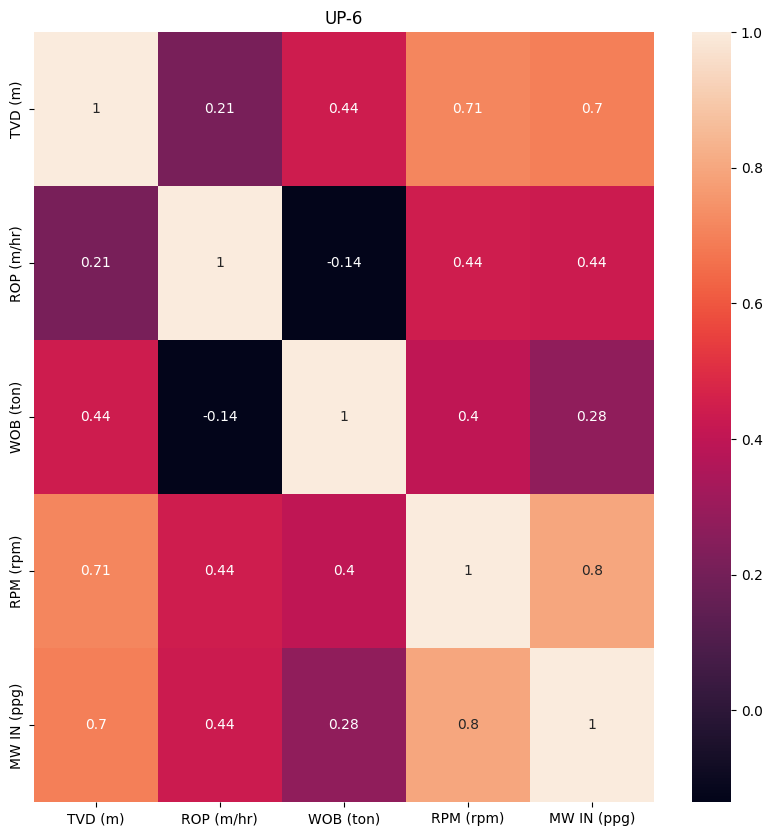

In [1580]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')

In [1581]:
data_up6.describe()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,1273.917839,84.100398,9.636689,140.845603,10.543717
std,725.552343,42.813343,3.502575,33.564465,0.798868
min,18.020000,2.700000,0.000000,21.000000,8.420000
25%,646.000000,50.800000,7.000000,134.000000,10.577000
50%,1273.940000,77.400000,10.000000,150.000000,10.919000
75%,1901.870000,115.800000,12.000000,164.000000,10.977000
max,2529.770000,309.100000,21.000000,196.000000,11.208000


# Scaling and Normalization

In [1582]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [1583]:
data_up6.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,18.02,25.6,2,62,8.7
1,19.00,35.5,2,57,8.7
2,19.50,20.6,2,43,8.7
3,19.50,20.1,2,58,8.7
4,19.50,19.9,2,58,8.7


In [1584]:
minmax_scaler.fit(data_up6)
std_scaler.fit(data_up6)

data_minmax = minmax_scaler.transform(data_up6)
data_std = std_scaler.transform(data_up6)

In [1585]:
data_minmax= pd.DataFrame(data_minmax, columns= data_up6.columns)
data_minmax.describe()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,0.500009,0.265667,0.458890,0.684832,0.761735
std,0.288863,0.139730,0.166789,0.191797,0.286538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250017,0.156984,0.333333,0.645714,0.773673
50%,0.500018,0.243799,0.476190,0.737143,0.896341
75%,0.750015,0.369125,0.571429,0.817143,0.917145
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [1586]:
data_minmax= pd.DataFrame(data_std, columns= data_up6.columns)
data_minmax.describe()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
count,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03
mean,-1.809580e-16,2.261974e-16,-2.261974e-16,-3.166764e-16,-5.881134e-16
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-1.731299e+00,-1.901664e+00,-2.751863e+00,-3.571320e+00,-2.658939e+00
25%,-8.656065e-01,-7.779590e-01,-7.529357e-01,-2.039945e-01,4.167043e-02
50%,3.054938e-05,-1.565337e-01,1.037474e-01,2.727950e-01,4.698616e-01
75%,8.656538e-01,7.405614e-01,6.748695e-01,6.899858e-01,5.424788e-01
max,1.731236e+00,5.256408e+00,3.244919e+00,1.643565e+00,8.316956e-01


# Normalization

In [1587]:
data_up6_norm = data_up6

In [1588]:
from sklearn.preprocessing import normalize
data_normal_up6 = normalize(X= data_up6_norm, norm='l2', axis=1)

In [1589]:
data_normal_up6 = pd.DataFrame(data_normal_up6, columns= data_up6_norm.columns)
data_normal_up6.head()

,TVD (m),ROP (m/hr),WOB (ton),RPM (rpm),MW IN (ppg)
0,0.257330,0.365574,0.028560,0.885374,0.124238
1,0.270056,0.504578,0.028427,0.810168,0.123657
2,0.372985,0.394025,0.038255,0.822479,0.166409
3,0.299895,0.309123,0.030758,0.891996,0.133799
4,0.300179,0.306337,0.030788,0.892841,0.133926


# Linear Regression

In [1590]:
X = data_normal_up6.drop(['ROP (m/hr)'], axis=1)
y = data_normal_up6['ROP (m/hr)']

In [1591]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1592]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)


X_train_scaled = sc.transform(X_train)
X_train_scaled

array([[ 0.32465036, -0.58565181, -0.44779976, -0.43247766],
       [ 0.31837363, -0.74361561, -0.32554538, -0.30184247],
       [ 0.17458825, -0.44289836, -0.04395113, -0.25572592],
       ...,
       [ 0.22222694, -0.42185786, -0.14537037, -0.30281804],
       [-0.42758245,  2.32519399,  1.22182745,  0.84714765],
       [ 0.16054458, -0.3202341 , -0.22935455, -0.29322651]])

In [1593]:
X_train.columns

Index(['TVD (m)', 'WOB (ton)', 'RPM (rpm)', 'MW IN (ppg)'], dtype='object')

In [1594]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_train_scaled.describe()

,TVD (m),WOB (ton),RPM (rpm),MW IN (ppg)
count,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03
mean,-3.216885e-16,9.721356e-18,2.828031e-17,-5.788626e-17
std,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00
min,-8.446802e+00,-1.076101e+00,-8.257012e-01,-5.757804e-01
25%,1.353030e-01,-5.808326e-01,-6.480989e-01,-5.006809e-01
50%,2.848133e-01,-4.420811e-01,-3.445433e-01,-3.610014e-01
75%,3.829589e-01,2.401953e-01,1.989367e-01,1.414750e-02
max,4.139324e-01,7.046961e+00,5.337249e+00,7.556409e+00


In [1595]:
X_test_scaled = sc.transform(X_test)

In [1596]:
X.columns

Index(['TVD (m)', 'WOB (ton)', 'RPM (rpm)', 'MW IN (ppg)'], dtype='object')

In [1597]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

In [1598]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled

,TVD (m),WOB (ton),RPM (rpm),MW IN (ppg)
0,0.262225,-0.162919,-0.177671,-0.248272
1,0.344088,-0.816817,-0.541588,-0.408896
2,0.391165,-0.611699,-0.672288,-0.514750
3,0.390814,-0.416734,-0.664585,-0.488174
4,0.345540,-0.476374,-0.555467,-0.435259
...,...,...,...,...
498,0.342892,-0.432879,-0.484234,-0.448420
499,-0.234321,0.070928,0.919563,0.302209
500,-0.526692,0.746198,1.166099,0.964257
501,0.406643,-0.481717,-0.749793,-0.571867


In [1599]:
sc.mean_

array([0.96371342, 0.01160329, 0.16787917, 0.0157507 ])

In [1600]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

## Model elevation on training set

In [1601]:
y_pred_train = regressor.predict(X_train_scaled)

Text(0.5, 1.0, 'using training set')

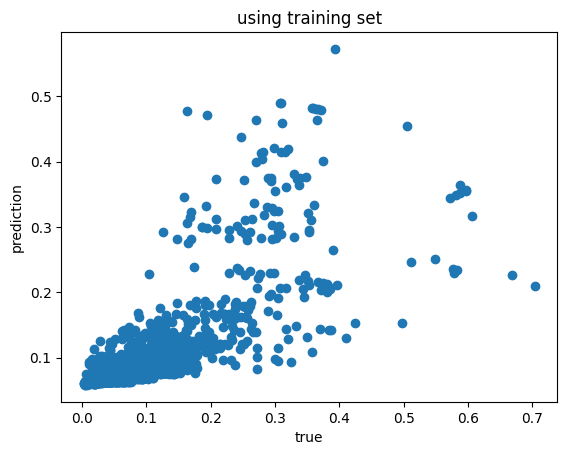

In [1602]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using training set')

In [1603]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.5690680926753913

In [1604]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train, squared=False)

0.05587908711216186

# Model elevation on testing set

In [1605]:
y_pred_test = regressor.predict(X_test_scaled)

In [1606]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.5487235955461015

In [1607]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test, squared=False)

0.04769953014391286

Text(0.5, 1.0, 'using testing set')

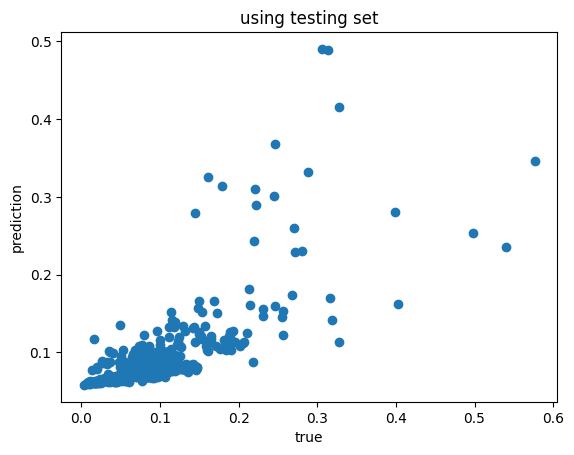

In [1608]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using testing set')

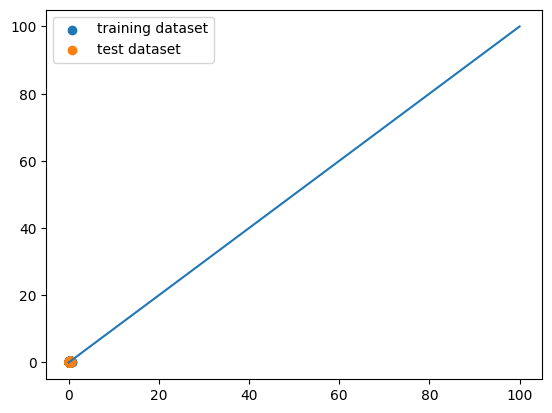

In [1609]:
plt.scatter(y_train, y_pred_train, label="training dataset")
plt.scatter(y_test, y_pred_test, label="test dataset")
plt.plot([0,100], [0,100])
plt.legend()

# Validation Curve and Learning Curve for Linear Regression

# Learning Curve

In [1610]:
train_sizes=np.linspace(0.05,1,9)

In [1611]:
train_sizes_abs, train_scores, test_scores = learning_curve(Ridge(), 
                                                            X_train_scaled, 
                                                            y_train, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [1612]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

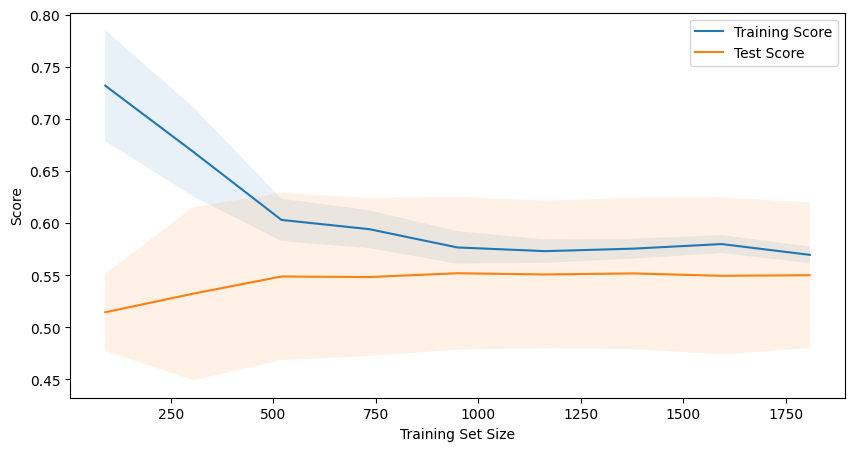

In [1613]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs, train_scores_mean, label='Training Score')
axes.plot(train_sizes_abs, test_scores_mean, label='Test Score')

axes.fill_between(train_sizes_abs,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1)

axes.fill_between(train_sizes_abs,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

# Validation Curve

In [1614]:
param_range = np.logspace(-7,5,13)

In [1615]:
train_scores, test_scores = validation_curve(estimator=Ridge(),
                                             X=X_train_scaled,
                                             y=y_train,
                                             param_name='alpha',
                                             param_range=param_range,
                                             cv=10)

In [1616]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

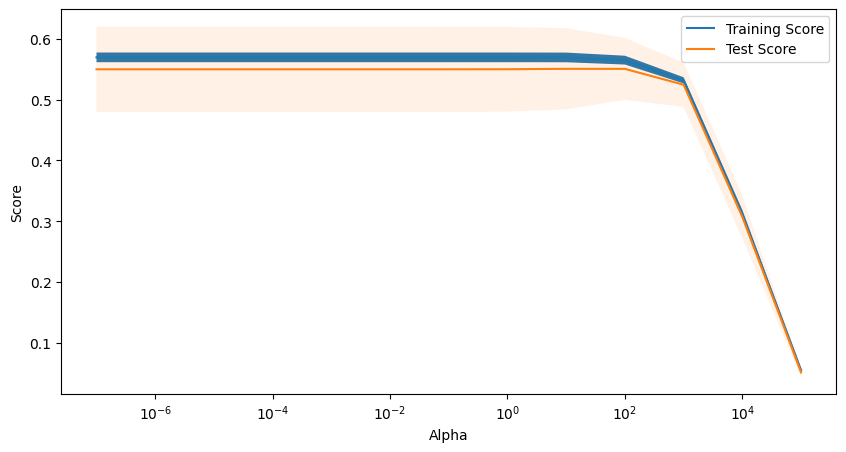

In [1617]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.semilogx(param_range, train_scores_mean, label='Training Score')
axes.semilogx(param_range, test_scores_mean, label='Test Score')

axes.fill_between(param_range,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std)

axes.fill_between(param_range,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Alpha')
axes.set_ylabel('Score')
axes.legend()

# Hyperparameter tuning for Linear Regression

In [1618]:
from sklearn.model_selection import GridSearchCV

In [1619]:
from sklearn.model_selection import GridSearchCV

# define searching domain (with grid search)
param_grid = {'solver':['auto', 'svd', 'cholesky'],
              'alpha': np.logspace(-7,5,5)}

# create search command
search = GridSearchCV(estimator=Ridge(),
                      param_grid=param_grid,
                      scoring='r2',
                      cv=5)

# command search step by training
search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-07, 1.e-04, 1.e-01, 1.e+02, 1.e+05]),
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [1620]:
search.best_params_

{'alpha': 0.1, 'solver': 'svd'}

In [1621]:
model_optimized = search.best_estimator_

In [1622]:
model_optimized.fit(X_train_scaled, y_train)

Ridge(alpha=0.1, solver='svd')

In [1623]:
y_pred_test = model_optimized.predict(X_test_scaled)

In [1624]:
y_pred_train = model_optimized.predict(X_train_scaled)

Text(0.5, 1.0, 'using testing set')

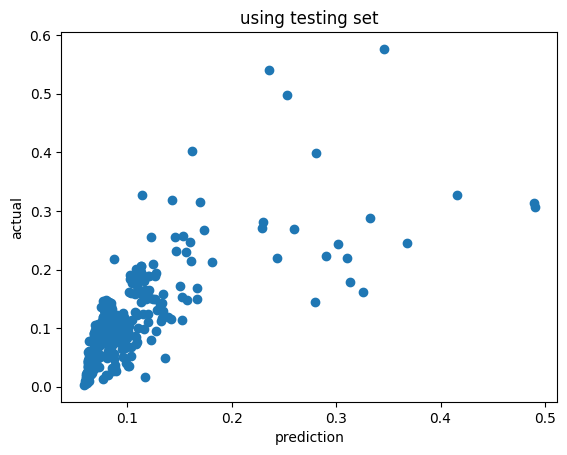

In [1625]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using testing set')

In [1626]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.548700563741753

Text(0.5, 1.0, 'using training set')

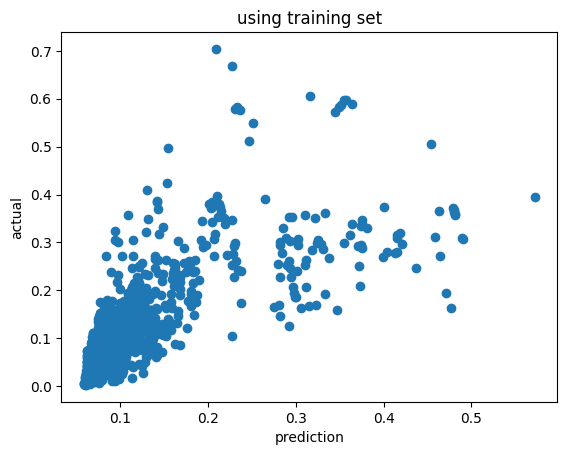

In [1627]:
plt.scatter(y_pred_train, y_train)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using training set')

In [1628]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.5690680814577719

# Permutation Feature Importance for Linear Regression

In [1629]:
r = permutation_importance(model_optimized,
                           X_train_scaled,
                           y_train,
                           n_repeats=10)

In [1630]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

MW IN (ppg)	0.959 +/- 0.044
RPM (rpm)	0.048 +/- 0.006
WOB (ton)	0.041 +/- 0.004


In [1631]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([2.26951994e-04, 4.06340889e-02, 4.83027816e-02, 9.58598493e-01])

In [1632]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([0, 1, 2, 3])

[Text(0, 0, 'TVD (m)'),
 Text(0, 1, 'WOB (ton)'),
 Text(0, 2, 'RPM (rpm)'),
 Text(0, 3, 'MW IN (ppg)')]

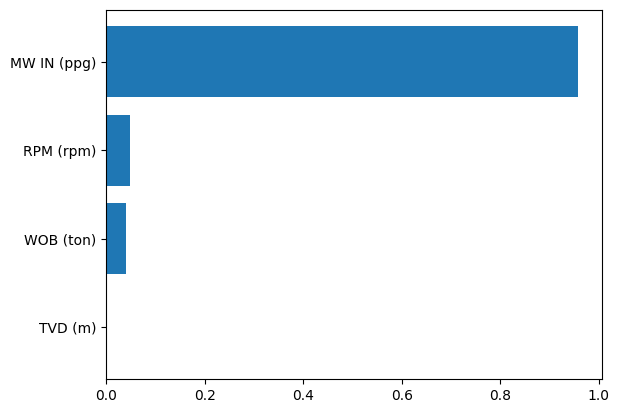

In [1633]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

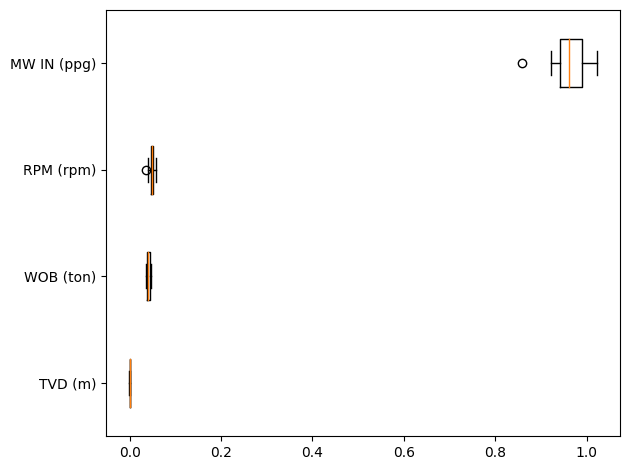

In [1634]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

In [1635]:
r.importances_mean

array([2.26951994e-04, 4.06340889e-02, 4.83027816e-02, 9.58598493e-01])

In [1636]:
r.importances_std

array([0.00038151, 0.0041405 , 0.00618364, 0.04350933])

# Result Interpretation

In [1637]:
regressor.intercept_

0.09751211216225893

In [1638]:
regressor.coef_

array([ 0.00093938, -0.01230107,  0.01324406,  0.05927059])

## Prediction using The Model

In [1639]:
input_FR = 428.1
input_WOB = 3
input_RPM = 70
input_MW_IN = 10.4

In [1640]:
input = np.array([input_FR, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428.1,   3. ,  70. ,  10.4]])

In [1641]:
output = regressor.predict(sc.transform(input))
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39.16926646])

# Cross-Validation

In [1642]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= regressor, X= X_train_scaled, y= y_train, cv= 10)
scores

array([0.68236757, 0.50229944, 0.52408285, 0.61681066, 0.45767605,
       0.50823602, 0.55422899, 0.60277348, 0.59623873, 0.45472329])

In [1643]:
np.mean(scores)

0.5499437081946096

In [1644]:
np.std(scores)

0.07015581630890617